# Bike sharing assignment
## Problem statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. They would like to understand the factors on which the demand for these shared bikes depends. Moreover, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### The steps we will follow in this exercise is as follows:
1. Reading, understanding and visualising the data
2. EDA: Visualize the data and understand the relationship between variables
3. Linear regression: model building
4. Residual Analysis of the train data
5. predictions and evaluation on the test set

### Step 1: Reading and Understanding the data (EDA)
- Load and analyze the data
- Check for null values column and row wise (no null data found across rows and column)
- Drop the columns which are not required
- Impute the data for understandability (<font color="red">Convert categorical column values into meaningful for understanding and later use pd.getDummies() for analysis </font>)
- Check for outliers (<font color="red">No outliers were found in the data </font>)
- Visualize the data (<font color="red">Few variables shows strong linearship dependency in between variables</font>)

In [1]:
#import the libraries required for further analysis
#Load the libraries which will be required further for analysis
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
import calendar
warnings.filterwarnings("ignore")

### 1.1 Load and analyze the data

In [2]:
#Load the data to perform analysis
data_location = "/Users/nyashasingh/Desktop/upgrad/upgrad-case-studies-solutions/upgrad-assignment/bike-sharing-assignment/day.csv"
bike_sharing = pd.read_csv(data_location)
bike_sharing.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of bike sharing housing dataframe.

In [3]:
#check the sape of data, 730 rows and 16 columns
print(bike_sharing.shape)

(730, 16)


In [4]:
#check the columns avaialble in dataset
print(bike_sharing.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
#print the column wise matrix
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Check the analysis of numerical variable. Few variables seems to be in different rage. So, later it's required to sacle the variable for further analysis

In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.2 Drop the columns which are not required
1. instant which is just an index column
2. dteday is extracted in from of yr(delta since start) and mnth (bike_sharing['mnth'].unique) prints all the month values
3. casual & registered, as both values are already summed up and available in cnt (as good as derived variable)

In [7]:
columnsToDrop = ['instant', 'dteday', 'casual', 'registered']
bike_sharing = bike_sharing.drop(columns = columnsToDrop)
bike_sharing.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#check the column counts, 4 columns should be dropped and values should be 16-4 = 12
bike_sharing.shape

(730, 12)

In [9]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualize the data into two categories to check for outliers (<font color="red">EDA</font>)
1. Categorical for box plot analyis
2. temp, atemp, hum & windspeed. (after box plot we can use pairplot to understand the relationship)

In [10]:
#check the unique values across columns for our analysis, it will help us in further understanding of analysis
bike_sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### 2.1 Handling outliers: 
Most of the data remains within range, we can consider all the data to be in scope

In [11]:
#### box plot for numerical variables temp, atemp, hum & windspeed
columns = ['temp', 'atemp', 'hum', 'windspeed']
print(bike_sharing[columns].describe())

             temp       atemp         hum   windspeed
count  730.000000  730.000000  730.000000  730.000000
mean    20.319259   23.726322   62.765175   12.763620
std      7.506729    8.150308   14.237589    5.195841
min      2.424346    3.953480    0.000000    1.500244
25%     13.811885   16.889713   52.000000    9.041650
50%     20.465826   24.368225   62.625000   12.125325
75%     26.880615   30.445775   72.989575   15.625589
max     35.328347   42.044800   97.250000   34.000021


### 2.2 Box plot for numerical variables

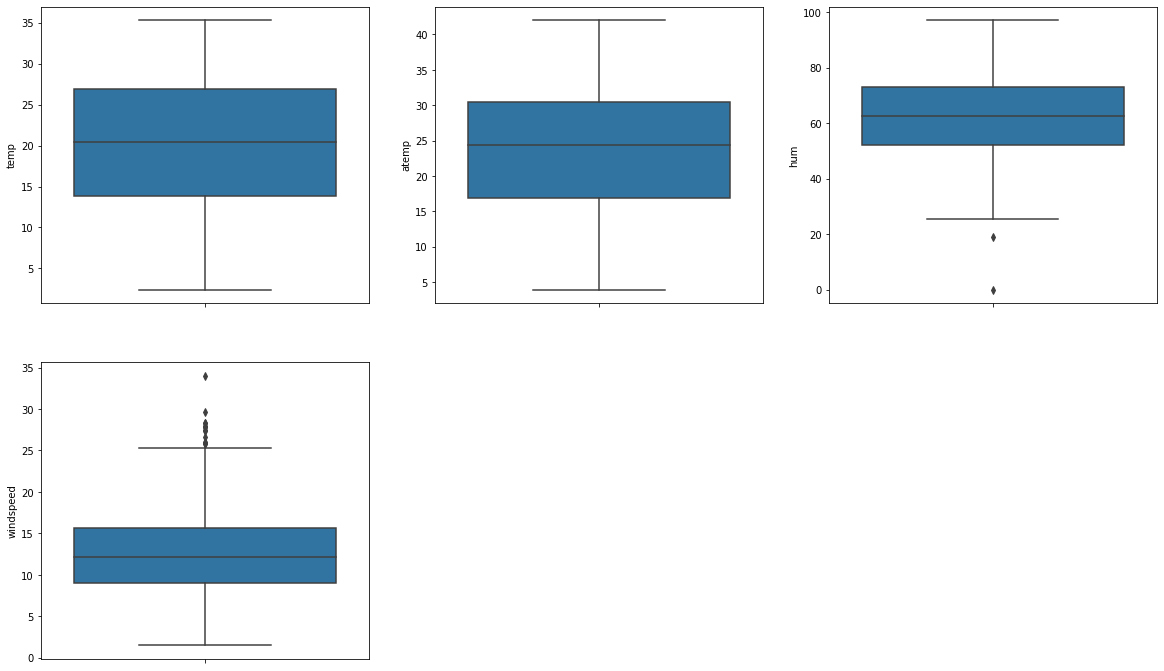

In [12]:
## Draw the box plot to figure out the outliers, later we use scaler (min-max) and VIF to understand the correlation between variables
plt.figure(figsize=(20, 12))
index = 1
for col in columns:
    plt.subplot(2,3,index)
    sns.boxplot(y = col, data = bike_sharing)
    index +=1
plt.show()

### 2.3 Draw the pairplot of numerical columns temp, a temp, hum, windspeed & cnt
### <font color="red">Inference : (Summary from pairplot & heatmap) </font>
 - temp and atemp variables are highly correlated with each other (<font color="red"> atemp variable may have been derived from temp later we drop this variable </font>
 - temp and atemp has highest correlation with target variable cnt

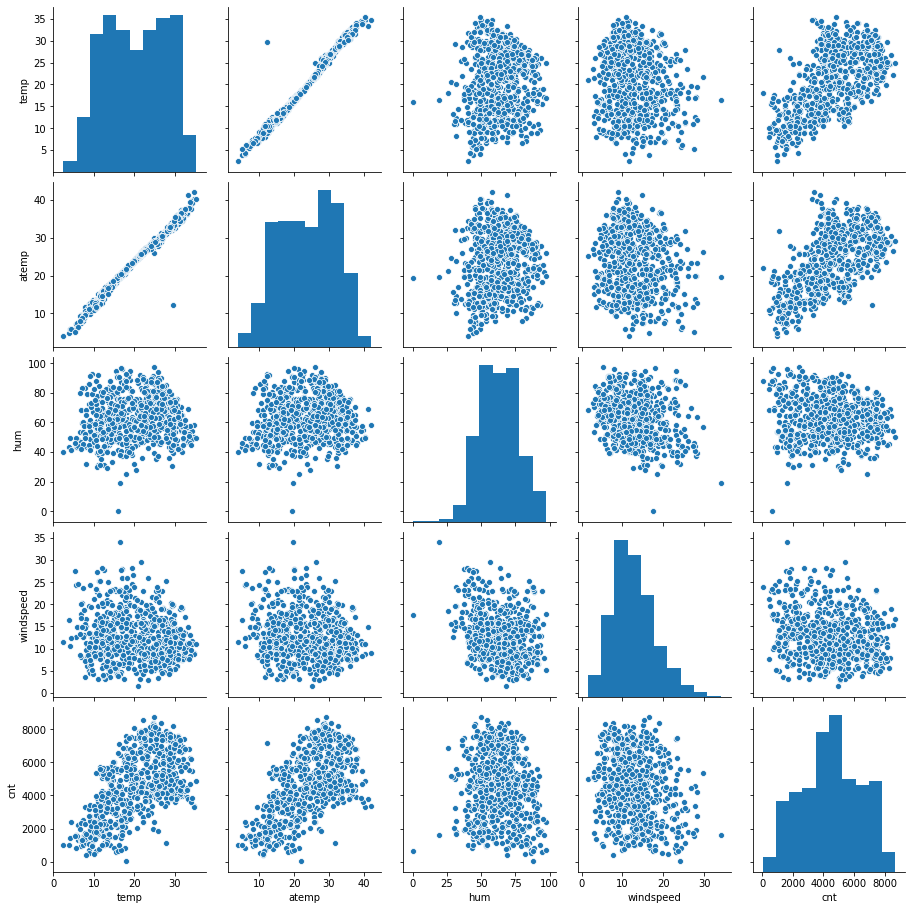

In [13]:
sns.pairplot(data = bike_sharing, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

### 2.4 Draw the heatmap i.e. correlation between variables

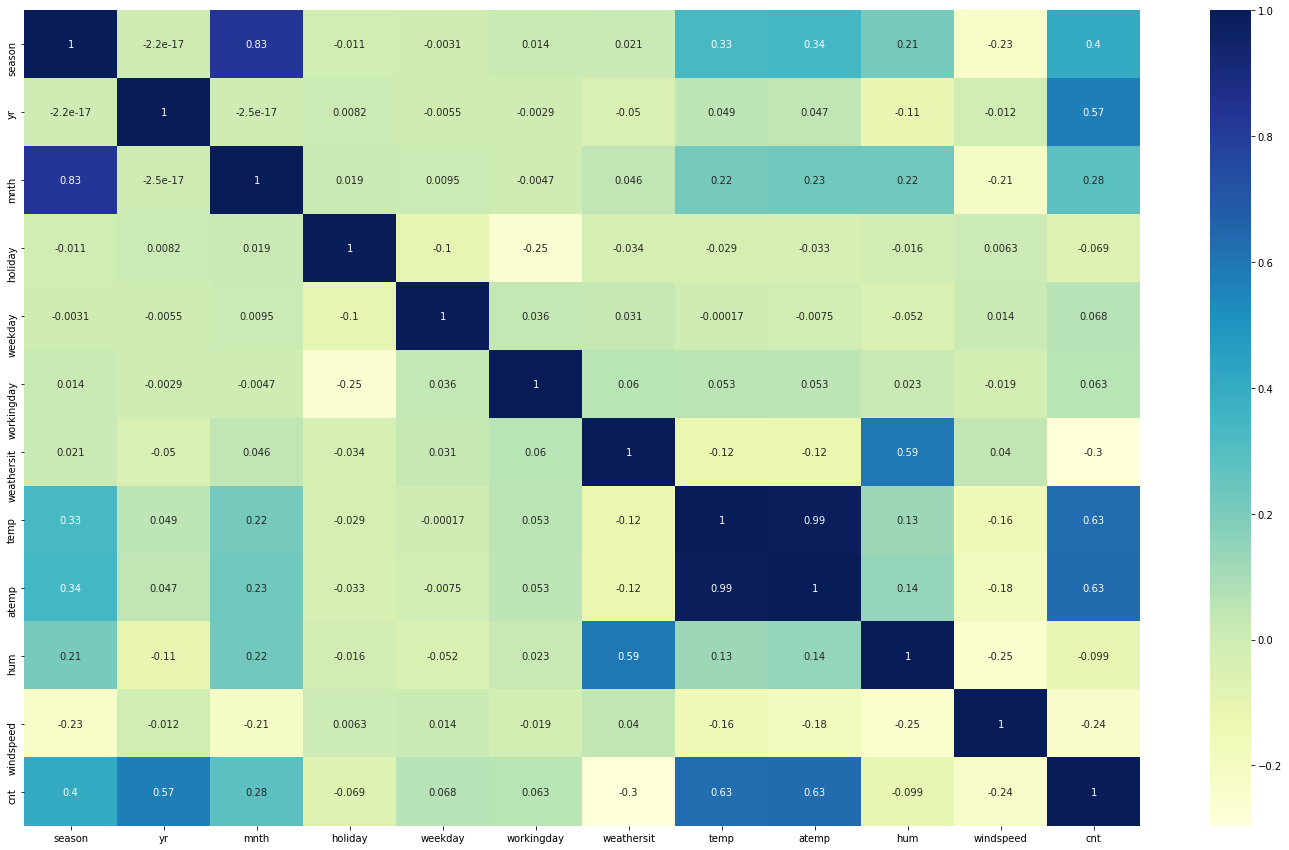

In [14]:
plt.figure(figsize=(25,15))

sns.heatmap(bike_sharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 2.5 Box plot analysis of categorical variable
1. Season 3 fall has highest demand for rental bikes
2. Demand is grows untill June. and drops in last quarter, however month 9 & 10 has highest demand
4. In holiday period demand increases
5. Weekday & workingday has almost no impact on bike sharing
6. The weathershit 1 (good) has highest demand followed by 2 (moderate) & 3 (moderate)


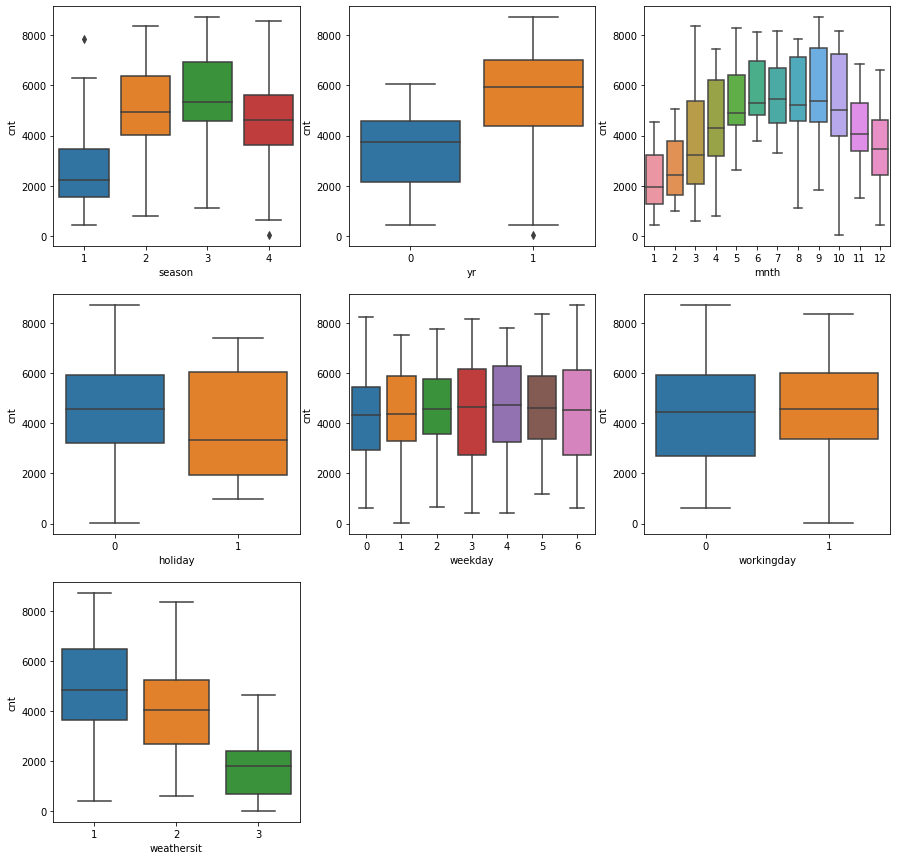

In [15]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data = bike_sharing, x=i[1], y='cnt')
plt.show()

## Step 3: Linear regression, Model Building
1. Create dummy variables
2. Split the data into parts (train & split)
3. Use RFE to select the features
4. Use manual approach i.e. statsModelApi to further limit the features.

In [16]:
# Importing required library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 3.1 Convert categorical values into meaningful column values for understandability

In [17]:
# Convert to 'category' data type
bike_sharing['season'] = bike_sharing['season'].astype('category')
bike_sharing['weathersit'] = bike_sharing['weathersit'].astype('category')
bike_sharing['mnth'] = bike_sharing['mnth'].astype('category')
bike_sharing['weekday'] = bike_sharing['weekday'].astype('category')

### 3.2 Create dummy variables for analysis

In [18]:
bike_sharing = pd.get_dummies(bike_sharing, drop_first=True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [19]:
# Check table values
print(bike_sharing.columns)
bike_sharing.head()

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#Check the column again
print(bike_sharing.columns)
print('Total colum length for analysis:', len(bike_sharing.columns))

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')
Total colum length for analysis: 30


### <font color="red">3.3  Split the data into train and test part</font>

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Split the data into 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 42)

In [23]:
print("Training data shape : ",df_train.shape)
print("Test data shape : ", df_test.shape)
df_train.info()

Training data shape :  (510, 30)
Test data shape :  (219, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 683 to 435
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8   

### 3.4 <font color="red">Scaling: </font> Rescale the features, use min-max scaler to represent the values in range of 0-1 for comparison

In [24]:
scaler = MinMaxScaler()
colums_2_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[colums_2_scale] = scaler.fit_transform(df_train[colums_2_scale])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,1,0,0,0,0,1,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,1,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,0,...,0,1,0,1,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.256863,0.260784,...,0.092157,0.074510,0.149020,0.131373,0.139216,0.147059,0.129412,0.150980,0.345098,0.029412
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.437332,0.439494,...,0.289531,0.262857,0.356457,0.338139,0.346511,0.354512,0.335985,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.5 Use RFE (i.e. recursive feature elimination) and automated approach to remove some columns

In [26]:
# remove the target variable from training dataset
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
# Limit the data set upto 15 features/column5
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
#print the colums with ranking..
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 2),
 ('mnth_4', False, 14),
 ('mnth_5', False, 6),
 ('mnth_6', False, 15),
 ('mnth_7', False, 3),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 9),
 ('weekday_2', False, 7),
 ('weekday_3', False, 13),
 ('weekday_4', False, 12),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [29]:
n_features_to_select = X_train.columns[rfe.support_]
print(n_features_to_select)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [30]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'],
      dtype='object')

### Draw a heatmap between variables reported by RFE
<font color="red">Infer (Summary):</font>
- mnth_july & temp has strong correlation
- mnth_nov & winter has strong correlation
- hum & weathersit_moderate and hum has high correlation

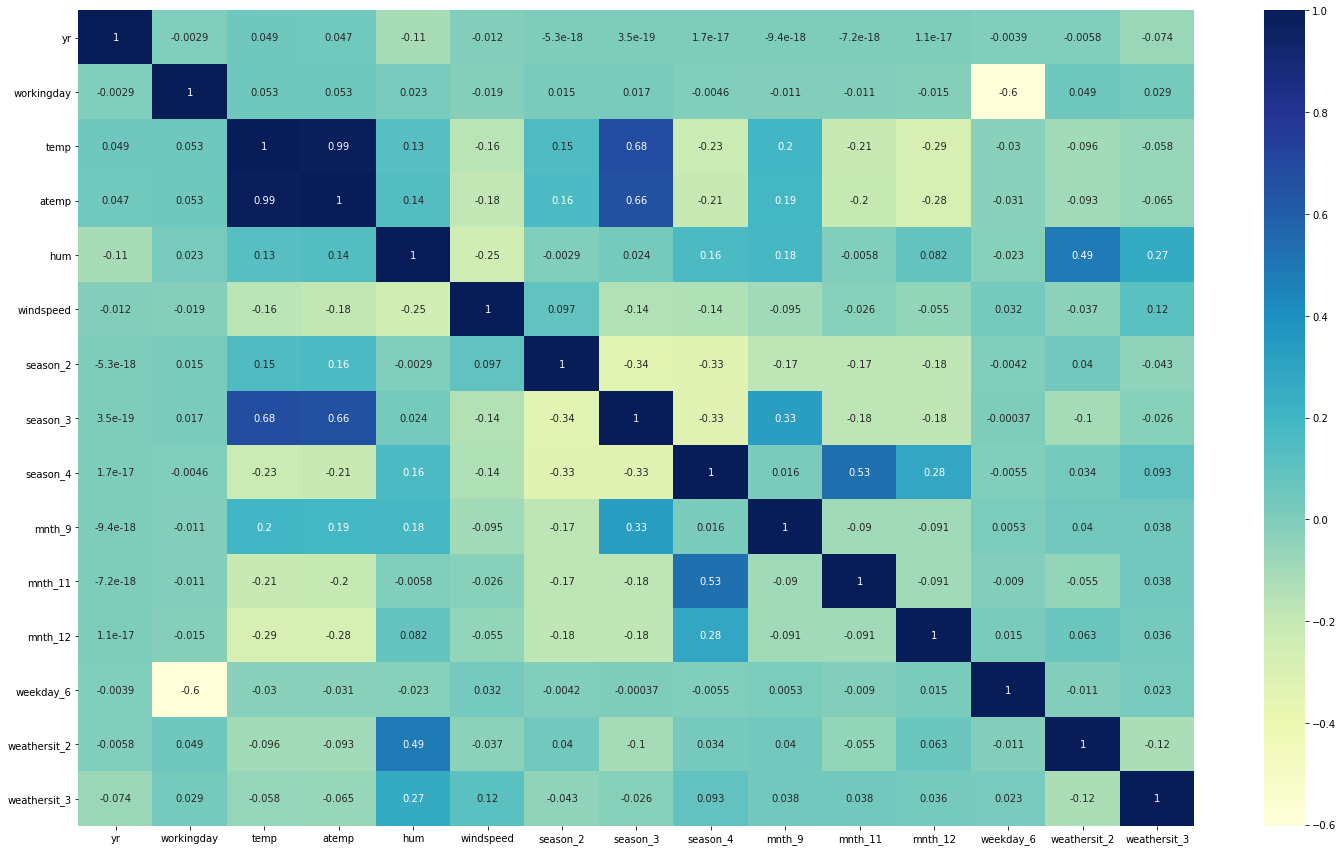

In [31]:
rfe_columns = ['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3']
corr = bike_sharing[rfe_columns].corr()
plt.figure(figsize=(25,15))

sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

### 3.6 Manual elimination by stats model api

#### Define common functions to print stats and calculate variance

In [32]:
# define commons functions to use further
def regression_by_stats_model(features_to_select):
    X_train_sm = sm.add_constant(X_train[features_to_select])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return X_train_sm, lm

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))
    return vif

In [33]:
#Print list of columns to be selected by variables
print(X_train.columns[rfe.support_])

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


### Draw a heatmap between variables reported by RFE
<font color="red">Infer (Summary):</font>
- mnth_july & temp has strong correlation
- mnth_nov & winter has strong correlation
- hum & weathersit_moderate and hum has high correlation

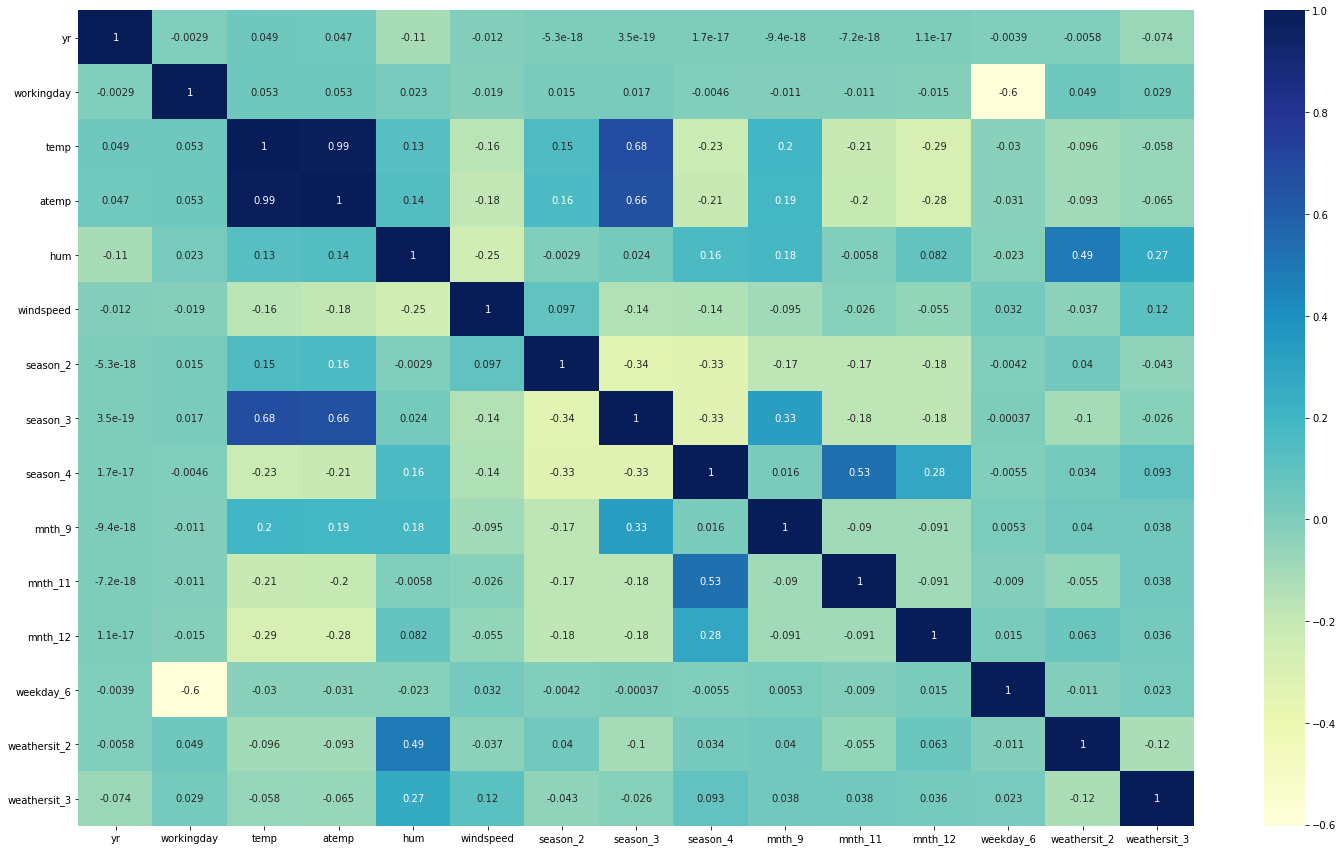

In [34]:
rfe_columns = ['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3']
corr = bike_sharing[rfe_columns].corr()
plt.figure(figsize=(25,15))

sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

### 3.6.1 Model-1 select all the variables reported by RFE
<font color="red">Infer (Summary):</font>
- temp p values > 0.05
- temp, atemp, hum, season_3 & windspeed has high variance, it may be dependent on other variables

In [35]:
#Selected columns for Model 1 - all columns selected by RFE,
columns_model_1 = ['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3']

x_train_m1, lr1 = regression_by_stats_model(columns_model_1)
calculate_vif(columns_model_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          7.23e-186
Time:                        00:22:02   Log-Likelihood:                 486.03
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     494   BIC:                            -872.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1439      0.032      4.469   

,Features,VIF
0,yr,2.06
1,workingday,4.47
2,temp,1259.65
3,atemp,1270.62
4,hum,18.49
5,windspeed,5.11
6,season_2,4.08
7,season_3,7.44
8,season_4,4.10
9,mnth_9,1.35


### 3.6.2 Model 2 Remove the variables <font color="red">atemp </font>as it has high P more than 0.5
<font color="red">Infer (Summary):</font>
- All variables p value < 0.05, but
- temp, hum & season_3 has high variance, it may be dependent on other variables

In [36]:
#Selected columns for Model 2 
columns_model_2 = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3']

x_train_m2, lr2 = regression_by_stats_model(columns_model_2)
calculate_vif(columns_model_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.6
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.32e-186
Time:                        00:22:02   Log-Likelihood:                 485.07
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     495   BIC:                            -876.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1477      0.032      4.599   

,Features,VIF
0,yr,2.05
1,workingday,4.45
2,temp,25.96
3,hum,17.40
4,windspeed,4.72
5,season_2,4.07
6,season_3,7.40
7,season_4,4.08
8,mnth_9,1.35
9,mnth_11,1.93


### 3.6.3 Model 3 Remove the variables <font color="red"> hum </font> as it has high variance
<font color="red">Infer (Summary):</font>
- Remove variable hum as from correlation heatmap we see that hum & cnt has negative correlation
 

In [37]:
#Selected columns for Model 3 
columns_model_3 = ['yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3']

x_train_m3, lr3 = regression_by_stats_model(columns_model_3)
calculate_vif(columns_model_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.3
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.41e-184
Time:                        00:22:02   Log-Likelihood:                 477.49
No. Observations:                 510   AIC:                            -927.0
Df Residuals:                     496   BIC:                            -867.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0540      0.021      2.530   

,Features,VIF
0,yr,2.05
1,workingday,4.15
2,temp,18.14
3,windspeed,4.32
4,season_2,3.97
5,season_3,6.97
6,season_4,4.07
7,mnth_9,1.32
8,mnth_11,1.89
9,mnth_12,1.31


### 3.6.4 Model 4 : Remove the variables <font color="red">season_3 </font>as it has high variance i.e. variabe is strongly dependent on others

In [38]:
#Selected columns for Model 4
columns_model_4 = ['yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2', 'weathersit_3']

x_train_m4, lr4 = regression_by_stats_model(columns_model_4)
calculate_vif(columns_model_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.2
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          3.24e-180
Time:                        00:22:02   Log-Likelihood:                 464.36
No. Observations:                 510   AIC:                            -902.7
Df Residuals:                     497   BIC:                            -847.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0253      0.021      1.198   

,Features,VIF
0,yr,2.04
1,workingday,4.10
2,temp,5.40
3,windspeed,4.16
4,season_2,1.66
5,season_4,2.30
6,mnth_9,1.24
7,mnth_11,1.80
8,mnth_12,1.30
9,weekday_6,1.69


### 3.6.5 Model 5 Remove the variables <font color="red">workingday </font> as it has not much impact

- From categorical analysis we see that workingday has no impact on bike sharing demand
- F-statistic has increased which dictates overall model fit.

In [39]:
#Selected columns for Model 5 
columns_model_5 = ['yr', 'temp', 'windspeed', 'season_2', 'weekday_6',
       'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3']

x_train_m5, lr5 = regression_by_stats_model(columns_model_5)
calculate_vif(columns_model_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          2.82e-177
Time:                        00:22:02   Log-Likelihood:                 454.62
No. Observations:                 510   AIC:                            -885.2
Df Residuals:                     498   BIC:                            -834.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0606      0.020      3.051   

,Features,VIF
0,yr,2.03
1,temp,4.14
2,windspeed,3.85
3,season_2,1.66
4,weekday_6,1.18
5,season_4,2.29
6,mnth_9,1.24
7,mnth_11,1.79
8,mnth_12,1.29
9,weathersit_2,1.54


### 3.6.6 Model 6 Remove the variables <font color="red">weekday_6 </font> as P value is on higher side and correlated with workingday

In [49]:
#Selected columns for Model 5 
columns_model_6 = ['yr', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3']

x_train_m6, lr6 = regression_by_stats_model(columns_model_6)
calculate_vif(columns_model_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.3
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          7.63e-178
Time:                        00:22:33   Log-Likelihood:                 453.15
No. Observations:                 510   AIC:                            -884.3
Df Residuals:                     499   BIC:                            -837.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0635      0.020      3.202   

,Features,VIF
0,yr,2.03
1,temp,4.12
2,windspeed,3.79
3,season_2,1.66
4,season_4,2.29
5,mnth_9,1.24
6,mnth_11,1.79
7,mnth_12,1.29
8,weathersit_2,1.54
9,weathersit_3,1.09


### 3.6.7 Summary model 6 performs better
- F-statistic: 225.3 (seems to be better compared to all)
- Variances seems to be < 5
- P values are very less

## Hypothesis testing for all the coefficients:
- As per hypothesis testing all the coefficients should be zero
- Coefficients observed are not zero so we reject null hypthesis

<font color="red">Coefficients for model 6</font>

- const 0.0635
- yr 0.2395
- temp 0.5757
- windspeed -0.0969
- season_2 0.0960
- season_4 0.1761
- mnth_9 0.0928
- mnth_11 -0.0521
- mnth_12 -0.0579
- weathersit_2 -0.0809
- weathersit_3 -0.2586

<font color="red">Best fit model euqations</font>

cnt = 0.0635 + (yr × 0.2395) + (temp × 0.5757) − (windspeed × 0.0969) + (season_2 × 0.0960) + (season_4 × 0.1761) + (mnth_9 × 0.0928) - (mnth_11 ×0.0521) − (mnth_12 × 0.0579) − (weathersit_2 × 0.0809) − (weathersit_3 × 0.2568)

## Step 5: <font color="red">Assumptions: </font> Residual Analysis of the train data
- Error terms are normally distributed, with mean zero.

In [41]:
#predict the target values
y_train_cnt = lr6.predict(x_train_m6)

Text(0.5, 0, 'Errors')

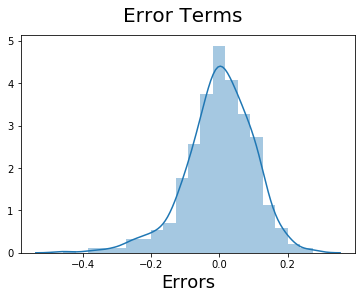

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
#residual = (y_train - y_train_price)
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6: Making predictions using the final model
- apply scaling on the test data set
- check the dataframe values
- use model to predict the values
- compare the predicted values w.r.t to y_test

In [43]:
#on test dataset we nevet fit anything so only use transform
df_test[colums_2_scale] = scaler.transform(df_test[colums_2_scale])

In [44]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553,0.237443,0.251142,...,0.059361,0.109589,0.132420,0.168950,0.141553,0.132420,0.173516,0.127854,0.315068,0.027397
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091,0.426491,0.434663,...,0.236840,0.313092,0.339723,0.375566,0.349389,0.339723,0.379560,0.334692,0.465607,0.163612
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    float64
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

#### devide the test dataset into two parts

In [46]:
y_test = df_test.pop('cnt')
X_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[columns_model_6]
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lr6.predict(X_test_new)

### Plot the graph between y_test & y_pred

Text(0, 0.5, 'y_pred')

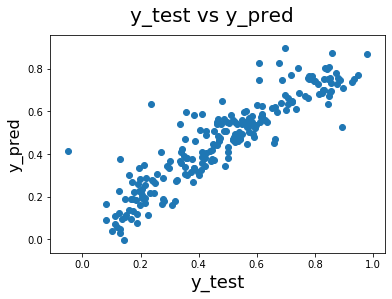

In [47]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Calculate the r2_score
- r2 score is approx. equal to the training data set, it means out model is good.

In [48]:
r2_score(y_test, y_pred)

0.8129414589498722

## Summary
 - Model r2 score and & test data r2 score are approximately same.